This is an simplified version of Saulius Simcikas's [model](https://forum.effectivealtruism.org/posts/L5EZjjXKdNgcm253H/corporate-campaigns-affect-9-to-120-years-of-chicken-life) of the cost effectiveness of corportate campaigning.

In this example model, the total-cost input is drawn from Salius's guesstimate distribution.  This model only covers egg-laying hens, while Salius's also adresses broiler's chickens.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import simulator as sim

First we define the model, _M_.

Currently, a normal input distributions can be created by either by `simulator.Parameter.normal(mean, std)` or by `simulator.Parameter.normal_from_range(low, high)` for a subjective confidence interval.  These distributions can then be combined through use of normal python operators `+, -, *, \`.  There is currently no support anything except these basic operations and (log)normal distributions.

In [7]:
M = sim.Model()

# The Parameter class, for easy access to creation routines for Parameter objects. 
P = sim.Parameter

us_commitments = P.normal_from_range(210e6, 270e6)
us_p_cage_free_anyway = P.lognormal_from_range(.18, .26)
us_counterfactual = us_commitments * (1 - us_p_cage_free_anyway)

int_commitments = P.lognormal_from_range(100e6, 300e6)
int_p_cage_free_anyway = P.normal_from_range(.2, .5)
int_counterfactual = int_commitments * (1 - int_p_cage_free_anyway)

tot_counterfactual = us_counterfactual + int_counterfactual

M.add_inputs({
    "us commitments (hens)": us_commitments,
    "us proportion cage free anyway": us_p_cage_free_anyway,
    "international commitments (hens)": int_commitments,
    "international proportion cage free anyway": int_p_cage_free_anyway
})
M.add_param("total counterfactual covered (hens)", tot_counterfactual)

tot_spending = P.dist_from_samples(np.loadtxt("spending samples.txt"))
ideal_per_dollar_per_year = tot_counterfactual / tot_spending

us_follow_through = P.lognormal_from_range(.33, .85)
int_follow_through = P.normal_from_range(.63, .9)

follow_through = (us_follow_through*us_counterfactual + \
    int_follow_through* int_counterfactual) / tot_counterfactual

hens_per_year_per_dollar = follow_through * ideal_per_dollar_per_year
years_of_impact = P.lognormal_from_range(4, 36)

hen_years_per_dollar = hens_per_year_per_dollar * years_of_impact

M.add_inputs({
    "total spending": tot_spending,
    "us follow through": us_follow_through,
    "international follow through": int_follow_through,
    "years of impact": years_of_impact
})
M.add_param("hen years affected per dollar", hen_years_per_dollar)

Now that we've created the model we can graph the sampled results for parameters of interest.

5th:  9.30
mean: 34.57
95th: 81.66

std: 25.9258



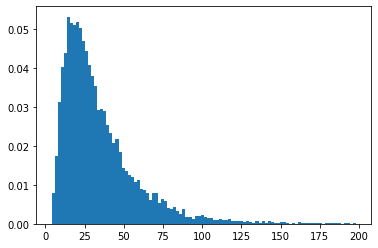

In [3]:
hen_years_per_dollar.print_summary();

We can also graph the correlations between one variable and all the input distributions.

In [4]:
M.input_r2s(hen_years_per_dollar, samples=int(1e5));

Input                                         r^2
-----------------------------------------  ------
years of impact                            0.6550
total spending                             0.0948
us follow through                          0.0279
international commitments (hens)           0.0230
international follow through               0.0039
international proportion cage free anyway  0.0034
us commitments (hens)                      0.0026
us proportion cage free anyway             0.0006


Or look at scatterplots for the correlations between two variables:

slope: 2.475470361491469
intercept: 0.14484748354153254
r^2: 0.6550310254773389


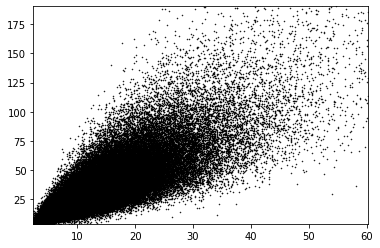

In [5]:
M.sensitivity(years_of_impact, hen_years_per_dollar)

Or create a graph comparing the outcome for the lowest 10% of sampled inputs for total spending (blue) to the highest 10% (orange).

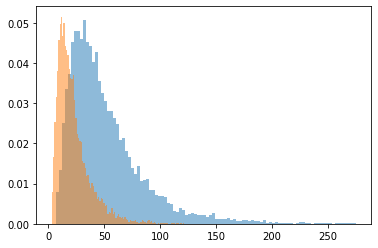

In [6]:
M.sensitivty_comparisons(tot_spending, hen_years_per_dollar)